# Triangular mesh plot

## 1. Import matplotlib and numpy

In [2]:
import matplotlib.pyplot as plt 
import matplotlib.tri as tri
import numpy as np
from matplotlib import font_manager


plt.rcParams['font.size'] = 10

plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'


## 2. Prepare Data

In [10]:
# First create the x and y coordinates of the points.
n_angles = 32
n_radii = 8
min_radius = 0.25
radii = np.linspace(min_radius, 0.95, n_radii)

angles = np.linspace(0, 2 * np.pi, n_angles, endpoint=False)
angles = np.repeat(angles[..., np.newaxis], n_radii, axis=1)
angles[:, 1::2] += np.pi / n_angles

x = (radii * np.cos(angles)).flatten()
y = (radii * np.sin(angles)).flatten()
z = (np.cos(radii) * np.cos(3 * angles)).flatten()

# Create the Triangulation; no triangles so Delaunay triangulation created.
triang = tri.Triangulation(x, y)

# Mask off unwanted triangles.
triang.set_mask(np.hypot(x[triang.triangles].mean(axis=1),
                         y[triang.triangles].mean(axis=1))
                < min_radius)

## 3. Call Plot API

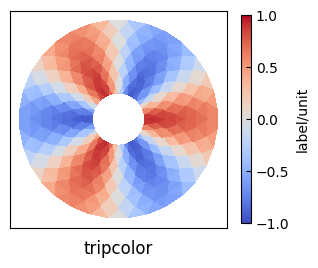

In [18]:
fig, ax = plt.subplots(figsize=(3.5, 3))

# 隐藏刻度线
ax.tick_params(axis='both', which='both', length=0)

# 隐藏刻度标签
ax.set_xticklabels([])
ax.set_yticklabels([])

# 设置坐标轴等比例
ax.set_aspect('equal')

# 绘制
tpc = ax.tripcolor(triang, z, shading='flat', 
                   cmap='coolwarm', vmin=-1.0, vmax=1.0)

# title
ax.set_title('tripcolor', y=-0.16)

# colormap
cbar = fig.colorbar(tpc, shrink=0.9)
cbar.set_label("label/unit")

# plt.savefig('demo.png', dpi=300, bbox_inches='tight')
plt.savefig('./cover/triplot.png', dpi=100, bbox_inches='tight')

plt.show()